CL6    610
CL0    428
CL2    204
CL1    193
CL3    185
CL5    157
CL4    108
Name: NICOTINE, dtype: int64
---MEAN
            ASCORE    CSCORE    ESCORE  IMPULSIVE    NSCORE    OSCORE  \
USER     -0.094599 -0.230718  0.000361   0.232963  0.106202  0.187667   
NON_USER  0.081497  0.199159 -0.000617  -0.188357 -0.091920 -0.163580   

                SS  
USER      0.271367  
NON_USER -0.241239  
---
---MEDIAN
            ASCORE    CSCORE    ESCORE  IMPULSIVE   NSCORE   OSCORE        SS
USER     -0.154870 -0.276070  0.003320   0.192680  0.13606  0.29338  0.401480
NON_USER  0.081497  0.199159 -0.000617  -0.188357 -0.09192 -0.16358 -0.241239
---
---STD
            ASCORE    CSCORE    ESCORE  IMPULSIVE    NSCORE    OSCORE  \
USER      1.023209  0.966650  1.034795   0.956719  1.022434  1.017285   
NON_USER  0.967658  0.981172  0.964441   0.908618  0.967670  0.948370   

                SS  
USER      0.939644  
NON_USER  0.920440  
---
        ASCORE    CSCORE    ESCORE  IMPULSIVE    NSCORE  

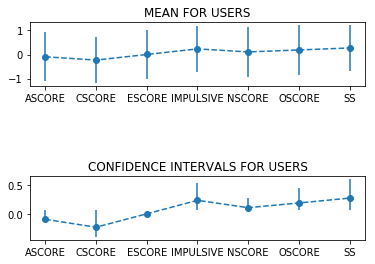

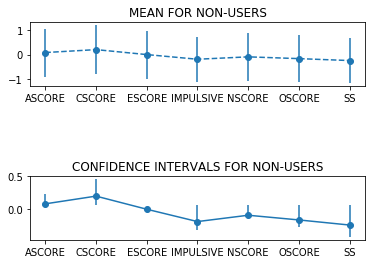

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import math as math
from scipy import stats


#SELECT THE DATA 
drug_cons_df = pd.read_csv('/Users/glebvorobcuk/Desktop/ACNM 2018/Term 2/Data Mining/Comp. Task 1/Data/drug_consumption.csv')
NICOTINE_df=drug_cons_df[['NSCORE','ESCORE','OSCORE','ASCORE','CSCORE','IMPULSIVE','SS','NICOTINE']]
#FILTER BY NICOTINE USERS


print(NICOTINE_df['NICOTINE'].value_counts())
#is_users=NICOTINE_df['NICOTINE'] == ["CL6","CL5","CL4"]
users_df=NICOTINE_df.loc[NICOTINE_df['NICOTINE'].isin(["CL4","CL5","CL6"])]
non_users_df=NICOTINE_df.loc[~NICOTINE_df['NICOTINE'].isin(["CL4","CL5","CL6"])]
#mean value for each score in users
U_NSCORE_mean = users_df['NSCORE'].mean()
U_ESCORE_mean = users_df['ESCORE'].mean()
U_OSCORE_mean = users_df['OSCORE'].mean()
U_ASCORE_mean = users_df['ASCORE'].mean()
U_CSCORE_mean = users_df['CSCORE'].mean()
U_IMPULSIVE_mean = users_df['IMPULSIVE'].mean()
U_SS_mean = users_df['SS'].mean()
U_MEAN_DATA = {"NSCORE":[U_NSCORE_mean], "ESCORE":[U_ESCORE_mean], "OSCORE":[U_OSCORE_mean], "ASCORE":[U_ASCORE_mean],"CSCORE":[U_CSCORE_mean], "IMPULSIVE":[U_IMPULSIVE_mean], "SS":[U_SS_mean]}
U_MEAN_df=pd.DataFrame(data=U_MEAN_DATA,index=['USER'])


#mean value for each score in non-users
NU_NSCORE_mean = non_users_df['NSCORE'].mean()
NU_ESCORE_mean = non_users_df['ESCORE'].mean()
NU_OSCORE_mean = non_users_df['OSCORE'].mean()
NU_ASCORE_mean = non_users_df['ASCORE'].mean()
NU_CSCORE_mean = non_users_df['CSCORE'].mean()
NU_IMPULSIVE_mean = non_users_df['IMPULSIVE'].mean()
NU_SS_mean = non_users_df['SS'].mean()
NU_MEAN_DATA = {"NSCORE":[NU_NSCORE_mean], "ESCORE":[NU_ESCORE_mean], "OSCORE":[NU_OSCORE_mean], "ASCORE":[NU_ASCORE_mean],"CSCORE":[NU_CSCORE_mean], "IMPULSIVE":[NU_IMPULSIVE_mean], "SS":[NU_SS_mean]}
NU_MEAN_df=pd.DataFrame(data=NU_MEAN_DATA,index=['NON_USER'])

#standart deviations for each score in users
U_NSCORE_std = users_df['NSCORE'].std()
U_ESCORE_std = users_df['ESCORE'].std()
U_OSCORE_std = users_df['OSCORE'].std()
U_ASCORE_std = users_df['ASCORE'].std()
U_CSCORE_std = users_df['CSCORE'].std()
U_IMPULSIVE_std = users_df['IMPULSIVE'].std()
U_SS_std = users_df['SS'].std()

U_STD_DATA = {"NSCORE":[U_NSCORE_std], "ESCORE":[U_ESCORE_std], "OSCORE":[U_OSCORE_std], "ASCORE":[U_ASCORE_std],"CSCORE":[U_CSCORE_std], "IMPULSIVE":[U_IMPULSIVE_std], "SS":[U_SS_std]}
U_STD_df=pd.DataFrame(data=U_STD_DATA,index=['USER'])

#standart deviations for each score in non-users
NU_NSCORE_std = non_users_df['NSCORE'].std()
NU_ESCORE_std = non_users_df['ESCORE'].std()
NU_OSCORE_std = non_users_df['OSCORE'].std()
NU_ASCORE_std = non_users_df['ASCORE'].std()
NU_CSCORE_std = non_users_df['CSCORE'].std()
NU_IMPULSIVE_std = non_users_df['IMPULSIVE'].std()
NU_SS_std = non_users_df['SS'].std()

NU_STD_DATA = {"NSCORE":[NU_NSCORE_std], "ESCORE":[NU_ESCORE_std], "OSCORE":[NU_OSCORE_std], "ASCORE":[NU_ASCORE_std],"CSCORE":[NU_CSCORE_std], "IMPULSIVE":[NU_IMPULSIVE_std], "SS":[NU_SS_std]}
NU_STD_df=pd.DataFrame(data=NU_STD_DATA,index=['NON_USER'])


#make two datasets. one for mean values for both classes. second for std.
print('---MEAN')
#concat mean
MEAN = ([U_MEAN_df,NU_MEAN_df])#first row users, second non-users
MEAN_df=pd.concat(MEAN)
print(MEAN_df)
print('---')


U_NSCORE_median = users_df['NSCORE'].median()
U_ESCORE_median = users_df['ESCORE'].median()
U_OSCORE_median = users_df['OSCORE'].median()
U_ASCORE_median = users_df['ASCORE'].median()
U_CSCORE_median = users_df['CSCORE'].median()
U_IMPULSIVE_median = users_df['IMPULSIVE'].median()
U_SS_median = users_df['SS'].median()
U_MEDIAN_DATA = {"NSCORE":[U_NSCORE_median], "ESCORE":[U_ESCORE_median], "OSCORE":[U_OSCORE_median], "ASCORE":[U_ASCORE_median],"CSCORE":[U_CSCORE_median], "IMPULSIVE":[U_IMPULSIVE_median], "SS":[U_SS_median]}
U_MEDIAN_df=pd.DataFrame(data=U_MEDIAN_DATA,index=['USER'])


#mean value for each score in non-users
NU_NSCORE_median = non_users_df['NSCORE'].median()
NU_ESCORE_median = non_users_df['ESCORE'].median()
NU_OSCORE_median = non_users_df['OSCORE'].median()
NU_ASCORE_median = non_users_df['ASCORE'].median()
NU_CSCORE_median = non_users_df['CSCORE'].median()
NU_IMPULSIVE_median = non_users_df['IMPULSIVE'].median()
NU_SS_median = non_users_df['SS'].median()
NU_MEDIAN_DATA = {"NSCORE":[NU_NSCORE_median], "ESCORE":[NU_ESCORE_median], "OSCORE":[NU_OSCORE_median], "ASCORE":[NU_ASCORE_median],"CSCORE":[NU_CSCORE_median], "IMPULSIVE":[NU_IMPULSIVE_median], "SS":[NU_SS_median]}
NU_MEDIAN_df=pd.DataFrame(data=NU_MEAN_DATA,index=['NON_USER'])


#make two datasets. one for mean values for both classes. second for std.
print('---MEDIAN')
#concat mean
MEDIAN = ([U_MEDIAN_df,NU_MEDIAN_df])#first row users, second non-users
MEDIAN_df=pd.concat(MEDIAN)
print(MEDIAN_df)
print('---')



#concat std
print('---STD')
STD = ([U_STD_df,NU_STD_df])#first row users, second non-users
STD_df=pd.concat(STD)
print(STD_df)
print('---')
#confidence intervals for mean 
#in for loop calculate intervals
alpha = 0.05
z=1.96

#low=mean-z*(std/size)
#up=mean+z*(std/size)


U_CONF_low = MEAN_df.iloc[[0]].subtract((STD_df.iloc[[0]].divide(math.sqrt(users_df.count()[0]))).mul(z))
U_CONF_up =  MEAN_df.iloc[[0]]+(STD_df.iloc[[0]].divide(math.sqrt(users_df.count()[0]))).mul(z)



NU_CONF_low = MEAN_df.iloc[[1]].subtract((STD_df.iloc[[1]].divide(math.sqrt(users_df.count()[0]))).mul(z))
NU_CONF_up =  MEAN_df.iloc[[1]]+(STD_df.iloc[[1]].divide(math.sqrt(users_df.count()[0]))).mul(z)


    
#concat confidence intervals dataframe. first row - lower bound,second upper bound.
U_CONF = ([U_CONF_low, U_CONF_up])
U_CONF_df=pd.concat(U_CONF)


NU_CONF = ([NU_CONF_low, NU_CONF_up])
NU_CONF_df=pd.concat(NU_CONF)

#plotting?
print(U_CONF_df)
print(NU_CONF_df)
#task 2
u_x=list(U_CONF_df)
x_=[1,2,3,4,5,6,7]

my_xticks = list(STD_df)
print(my_xticks)

u_err=[U_CONF_df.iloc[0],U_CONF_df.iloc[1]]
nu_err=[NU_CONF_df.iloc[0],NU_CONF_df.iloc[1]]

plt.figure(1)
plt.subplot(311)
plt.title("MEAN FOR USERS")
plt.errorbar(x_,MEAN_df.iloc[0].values,yerr=STD_df.iloc[0],fmt='--o')
plt.xticks(x_, my_xticks)

plt.subplot(313)  
plt.title("CONFIDENCE INTERVALS FOR USERS")
plt.errorbar(x_,MEAN_df.iloc[0].values,yerr=u_err,fmt='--o')
plt.xticks(x_, my_xticks)

plt.figure(2)
plt.subplot(311)
plt.title("MEAN FOR NON-USERS")
plt.errorbar(x_,MEAN_df.iloc[1].values,yerr=STD_df.iloc[1],fmt='--o')
plt.xticks(x_, my_xticks)

plt.subplot(313)
plt.title("CONFIDENCE INTERVALS FOR NON-USERS")
plt.errorbar(x_,MEAN_df.iloc[1].values,yerr=nu_err,fmt='--o')
plt.xticks(x_, my_xticks)
#what psycological profile is?

#Task 2
t,p=stats.stats.ttest_ind_from_stats(MEAN_df.iloc[0], STD_df.iloc[0], users_df.count()[0], MEAN_df.iloc[1], STD_df.iloc[1], users_df.count()[1], equal_var=False)
print(len(p))
for i in range(len(p)):
    if p[i] >= 0.025:
        print(list(MEAN_df)[i],"Is significant",'p-value:',p[i])
    else: 
        print(list(MEAN_df)[i],"Is not significant",'p-value:',p[i])


#Task 3

#skewness
#users_skew=pd.DataFrame(users_df.skew(),columns=['USERS'])
#non_users_skew=pd.DataFrame(non_users_df.skew(),columns=['NON-USERS'])
#print(users_skew)
#print(non_users_skew)
#print('----')




